# Day 9 "Smoke Basin"

## Part 1

### Problem

These caves seem to be lava tubes. Parts are even still volcanically active; small hydrothermal vents release smoke into the caves that slowly settles like rain.

If you can model how the smoke flows through the caves, you might be able to avoid it and be that much safer. The submarine generates a heightmap of the floor of the nearby caves for you (your puzzle input).

Smoke flows to the lowest point of the area it's in. For example, consider the following heightmap:

    2199943210
    3987894921
    9856789892
    8767896789
    9899965678

Each number corresponds to the height of a particular location, where 9 is the highest and 0 is the lowest a location can be.

Your first goal is to find the low points - the locations that are lower than any of its adjacent locations. Most locations have four adjacent locations (up, down, left, and right); locations on the edge or corner of the map have three or two adjacent locations, respectively. (Diagonal locations do not count as adjacent.)

In the above example, there are four low points, all highlighted: two are in the first row (a 1 and a 0), one is in the third row (a 5), and one is in the bottom row (also a 5). All other locations on the heightmap have some lower adjacent location, and so are not low points.

The risk level of a low point is 1 plus its height. In the above example, the risk levels of the low points are 2, 1, 6, and 6. The sum of the risk levels of all low points in the heightmap is therefore 15.

Find all of the low points on your heightmap. What is the sum of the risk levels of all low points on your heightmap?

### Setup

Data model is a simple array, with a '9' border to simplify the code by getting rid of bounds tests, which also enables nice offset-based addressing.

In [1]:
from utils import *

_input = initDay('day9')
_sample = getMarkdown('For example')

class Board:
    def __init__(self, text):
        lines = [l.strip() for l in text.strip().splitlines()]  # parse
        self.cx, self.cy = len(lines[0])+2, len(lines)+2        # dimensions w border
        self.adj = [-self.cx, -1, 1, self.cx]                   # adjacent cell offsets
        self.grid = (
            [9]*self.cx +                                       # top border
            [int(c) for l in lines for c in ('9'+l+'9')] +      # line as ints + borders
            [9]*self.cx)                                        # bottom border

    def plot(self):
        xy = []
        for y in range(self.cy):
            xy.append([self.grid[y*self.cx+x] / 9 for x in range(self.cx)])

        plt.figure(figsize=(self.cx/12, self.cy/12))
        fig = plt.imshow(xy, cmap='ocean', interpolation='nearest')
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)


### Solution

Both problem parts need the ability to find all minima. To do this, go through each cell, yield any that are the minimum of their adjacents.

The problem is simple math after that.

Part 1 Result: 588


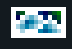

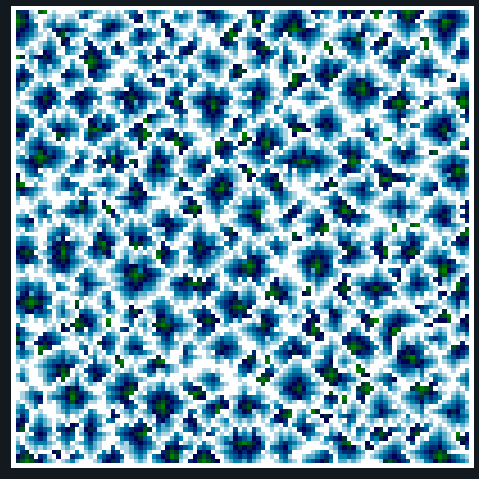

In [2]:
def select_minima(board):
    for base in [y*board.cx+x for y in range(1, board.cy-1) for x in range(1, board.cx-1)]:
        if all([board.grid[base] < board.grid[base+o] for o in board.adj]):
            yield base

def solve1(text):
    board = Board(text)
    board.plot()
    return sum([board.grid[o]+1 for o in select_minima(board)])

check(solve1(_sample), 15)
check1(solve1(_input))

## Part 2

### Problem

Next, you need to find the largest basins so you know what areas are most important to avoid.

A basin is all locations that eventually flow downward to a single low point. Therefore, every low point has a basin, although some basins are very small. Locations of height 9 do not count as being in any basin, and all other locations will always be part of exactly one basin.

The size of a basin is the number of locations within the basin, including the low point. The example above has four basins.

The top-left basin, size 3:

    2199943210
    ^^
    3987894921
    ^
    9856789892

    8767896789

    9899965678

The top-right basin, size 9:

    2199943210
         ^^^^^
    3987894921
          ^ ^^
    9856789892
            ^
    8767896789

    9899965678

The middle basin, size 14:

    2199943210

    3987894921
      ^^^
    9856789892
     ^^^^^
    8767896789
    ^^^^^
    9899965678
     ^

The bottom-right basin, size 9:

    2199943210

    3987894921

    9856789892
           ^
    8767896789
          ^^^
    9899965678
         ^^^^^

Find the three largest basins and multiply their sizes together. In the above example, this is `9 * 14 * 9 = 1134`.

What do you get if you multiply together the sizes of the three largest basins?

### Solution

For each minima, do a depth first walk, returning on any 9. Count visited cells, and also set them to 9 to mark them as visited.

Result is some simple math.

In [3]:
def solve2(text):
    board = Board(text)

    def fill(off):
        if board.grid[off] == 9:
            return 0
        board.grid[off] = 9
        return sum([fill(off+o) for o in board.adj])+1

    basins = [fill(base) for base in select_minima(board)]
    return reduce((lambda a, b: a*b), sorted(basins)[-3:])

check(solve2(_sample), 1134)
check2(solve2(_input))

Part 2 Result: 964712
